In [1]:
%load_ext autoreload
%autoreload 2

from os import walk
import time
import datetime as datetime
import random
import json
import re
import statsmodels.api as sm
import pandas as pd
import numpy as np
import scipy as sp
import scipy.sparse as sps
from sklearn import linear_model
import math

from Entity import Match
from common import * 
from Storages import *
from BetsStorage import *
from TTMatchModel import *

from IPython.display import display

import matplotlib as mpl
import matplotlib.patches as patches
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 80%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 79%; }
</style>
"""))

In [2]:
playersDict = GlobalPlayersDict()

Bad name yang min m805 m1419
Bad name min yang m805 m1419
Bad name денис макаров m9378 m16244
Bad name макаров денис m9378 m16244
Bad name дмитрий осипов m2866 m16251
Bad name осипов дмитрий m2866 m16251
Bad name олег попов m2948 m16397
Bad name попов олег m2948 m16397
Bad name yang ying m1682 w2033
Bad name ying yang m1682 w2033
Bad name li xiang m1613 w2718
Bad name xiang li m1613 w2718


In [3]:
sources = []
sources.append(['master_tour', r'C:\Programming\SportPrognoseSystem\TTStat\prepared_data\master_tour\all_results.txt'])
sources.append(['liga_pro', r'C:\Programming\SportPrognoseSystem\TTStat\prepared_data\liga_pro\all_results.txt'])
#sources.append(['challenger_series', r'C:\Programming\SportPrognoseSystem\TTStat\prepared_data\challenger_series\all_results.txt'])
sources.append(['bkfon', r'C:\Programming\SportPrognoseSystem\TTStat\prepared_data\bkfon\all_results.txt'])
#sources.append(['local', r'D:\Programming\SportPrognoseSystem\TTStat\prepared_data\local\kchr_results.txt'])
#sources.append(['ittf', r'D:\Programming\SportPrognoseSystem\TTStat\prepared_data\ittf\all_results.txt'])
#sources.append(['rttf', r'D:\Programming\SportPrognoseSystem\TTStat\prepared_data\rttf\all_results.txt'])

matchesStorage = MatchesStorage(sources)
print(len(matchesStorage.matches))

C:\Programming\SportPrognoseSystem\TTStat\prepared_data\master_tour\all_results.txt
C:\Programming\SportPrognoseSystem\TTStat\prepared_data\liga_pro\all_results.txt
C:\Programming\SportPrognoseSystem\TTStat\prepared_data\bkfon\all_results.txt
25447


In [4]:
for match in matchesStorage.getOneVSOneMatches('m279', 'm146', '2017-04-01', '23:59', 200):
    print(match.toStr())

2017-02-24	11:27	Лига-Про (1000-1200), 2017-02-24	m279	m146	2:3	9:11;7:11;11:7;11:7;2:11	37625364319907629277919093840
2017-04-01	21:43	Лига-Про (1000-1200), 2017-04-01	m279	m146	2:3	6:11;11:9;11:6;6:11;12:14	65343211149340226225241046854
2017-04-01	23:49	Лига-Про (1000-1200), 2017-04-01	m279	m146	2:3	13:15;7:11;11:4;11:4;6:11	68490272014687774951578404952


In [5]:
matchesBetsStorage = BetsStorage()
matchesBetsStorage.loadFromFile('prepared_data/bkfon/live/all_bets_prepared.txt')
print(len(matchesBetsStorage.bets))

not unique bet match hash
['2017-04-03 16:00:33', 'm181', 'm236', 0, 3]
2017-04-14 19:26:37 Наст. теннис. Лига Про. Москва [['m2843'], ['m9198']] 0:2 7:11;9:11;9:9; 0:3 7:11;9:11;9:11;
2017-04-14 23:54:14 Наст. теннис. Лига Про. Москва [['m16233'], ['m9198']] 2:2 11:6;14:12;6:11;6:11;10:6; 3:2 11:6;14:12;6:11;6:11;11:6;
2017-04-15 12:00:07 Наст. теннис. Лига Про. Москва [['m404'], ['m448']] 2:2 13:11;11:13;8:11;14:12;1:8; 2:3 13:11;11:13;8:11;14:12;3:11;
2017-04-15 12:33:56 Наст. теннис. Лига Про. Москва [['m2730'], ['m475']] 2:2 11:9;8:11;5:11;11:7;9:6; 3:2 11:9;8:11;5:11;11:7;11:6;
2017-04-15 22:20:38 Наст. теннис. Лига Про. Москва [['m604'], ['m616']] 2:0 11:6;17:15;10:7; 3:0 11:6;17:15;11:7;
2017-04-15 23:04:05 Наст. теннис. Лига Про. Москва [['m616'], ['m16247']] 1:2 10:12;7:11;11:6;7:10; 1:3 10:12;7:11;11:6;7:11;
2017-04-15 23:25:53 Наст. теннис. Лига Про. Москва [['m604'], ['m2781']] 2:1 11:3;11:2;9:11;10:5; 3:1 11:3;11:2;9:11;11:5;
2017-04-16 12:16:01 Наст. теннис. Лига Про. Мо

2017-04-24 12:53:17 Наст. теннис. Лига Про. Москва [['m10773'], ['m3344']] 2:2 12:10;11:6;7:11;6:11;4:10; 2:3 12:10;11:6;7:11;6:11;4:11;
2017-04-24 12:59:05 Наст. теннис. Лига Про. Москва [['m146'], ['m322']] 2:0 11:8;13:11;11:10; 3:0 11:8;13:11;12:10;
2017-04-24 13:31:19 Наст. теннис. Лига Про. Москва [['m16237'], ['m11608']] 2:2 12:10;4:11;11:8;7:11;9:10; 2:3 12:10;4:11;11:8;7:11;9:11;
2017-04-24 14:01:05 Наст. теннис. Лига Про. Москва [['m146'], ['m2342']] 2:2 10:12;11:6;9:11;13:11;8:10; 2:3 10:12;11:6;9:11;13:11;9:11;
2017-04-24 14:21:35 Наст. теннис. Лига Про. Москва [['m10773'], ['m11608']] 1:2 4:11;10:12;11:9;5:10; 1:3 4:11;10:12;11:9;5:11;
2017-04-24 14:36:44 Наст. теннис. Лига Про. Москва [['m124'], ['m322']] 2:1 11:7;12:10;10:12;6:1; 3:1 11:7;12:10;10:12;11:4;
2017-04-24 15:18:51 Наст. теннис. Лига Про. Москва [['m124'], ['m292']] 1:2 11:13;11:6;4:11;9:9; 1:3 11:13;11:6;4:11;9:11;
2017-04-24 15:29:19 Наст. теннис. Лига Про. Москва [['m11608'], ['m3344']] 2:2 12:10;5:11;11:9;8

not unique bet match hash
['2017-05-23 14:55:00', 'm126', 'm181', 0, 3]
not unique bet match hash
['2017-06-04 12:03:50', 'm577', 'm537', 3, 2]
not unique bet match hash
['2017-06-07 12:10:29', 'm264', 'm249', 0, 0]
2017-04-13 09:55:05 Наст. теннис. Жен. Лига Про. Москва [['w62'], ['w136']] 2:1 12:14;11:8;11:9;10:8; 3:1 12:14;11:8;11:9;11:8;
2017-04-13 10:33:07 Наст. теннис. Жен. Лига Про. Москва [['w31'], ['w20']] 2:1 12:14;17:15;11:8;11:10; 3:1 12:14;17:15;11:8;12:10;
2017-04-13 11:19:37 Наст. теннис. Жен. Лига Про. Москва [['w136'], ['w137']] 0:2 8:11;6:11;6:9; 0:3 8:11;6:11;6:11;
2017-04-13 11:37:41 Наст. теннис. Жен. Лига Про. Москва [['w62'], ['w31']] 0:0 11:11; 1:3 13:11;10:12;9:11;10:12;
2017-04-13 11:53:02 Наст. теннис. Жен. Лига Про. Москва [['w62'], ['w31']] 1:2 13:11;10:12;9:11;10:11; 1:3 13:11;10:12;9:11;10:12;
not unique bet match hash
['2017-04-13 11:53:02', 'w62', 'w31', 1, 3]
2017-04-13 12:14:12 Наст. теннис. Жен. Лига Про. Москва [['w137'], ['w20']] 2:2 4:11;11:2;11:5

2017-04-17 13:15:31 Наст. теннис. Жен. Мастер-Тур. С-Петербург [['w73'], ['w120']] 2:2 15:13;10:12;11:8;4:11;10:11; 2:3 15:13;10:12;11:8;4:11;10:12;
2017-04-18 11:40:10 Наст. теннис. Жен. Мастер-Тур. С-Петербург [['w4'], ['w27']] 0:0 14:15; 0:3 14:16;8:11;5:11;
2017-04-18 11:53:41 Наст. теннис. Жен. Мастер-Тур. С-Петербург [['w4'], ['w27']] 0:2 14:16;8:11;5:7; 0:3 14:16;8:11;5:11;
not unique bet match hash
['2017-04-18 11:53:41', 'w4', 'w27', 0, 3]
2017-04-18 12:12:11 Наст. теннис. Жен. Мастер-Тур. С-Петербург [['w120'], ['w22']] 0:2 7:11;4:11;0:9; 0:3 7:11;4:11;0:11;
2017-04-18 12:32:02 Наст. теннис. Жен. Мастер-Тур. С-Петербург [['w42'], ['w73']] 0:2 7:11;6:11;5:9; 0:3 7:11;6:11;5:11;
2017-04-18 13:01:06 Наст. теннис. Жен. Мастер-Тур. С-Петербург [['w42'], ['w4']] 2:2 11:9;11:3;12:14;11:13;9:9; 2:3 11:9;11:3;12:14;11:13;9:11;
2017-04-18 13:46:21 Наст. теннис. Жен. Мастер-Тур. С-Петербург [['w73'], ['w120']] 2:0 11:5;11:3;10:7; 3:0 11:5;11:3;11:7;
2017-04-18 14:06:45 Наст. теннис. Жен

In [10]:
rankingSources = []
rankingSources.append(['ttfr', 'prepared_data/propingpong/ranking_rus.txt'])
rankingSources.append(['ittf', 'prepared_data/propingpong/ranking_ittf.txt'])
rankingSources.append(['my', ['prepared_data/rankings/rankings_m_sets_0.txt', 'prepared_data/rankings/rankings_w_sets_0.txt']])
rankingSources.append(['liga_pro', 'prepared_data/liga_pro/ranking_liga_pro.txt'])

rankingStorage = RankingsStorage(rankingSources)

In [11]:
print([e for e in sorted(rankingStorage.rankings['my']['m261'].items(), key = lambda x: x[0])])
rankingStorage.getRankings('m2706', 'my', '2017-03-27', ws = 365)

[('2016-06-05', ['-1.63327252786', '1732']), ('2016-06-06', ['-1.63000741731', '1731']), ('2016-06-07', ['-1.63473536668', '1734']), ('2016-06-08', ['-1.63399460374', '1741']), ('2016-06-09', ['-1.62538042686', '1742']), ('2016-06-10', ['-1.62818946119', '1739']), ('2016-06-11', ['-1.62562175791', '1734']), ('2016-06-12', ['-1.62363354761', '1733']), ('2016-06-13', ['-1.61883347774', '1737']), ('2016-06-14', ['-1.62514173266', '1732']), ('2016-06-15', ['-1.63185942457', '1734']), ('2016-06-16', ['-1.63286376089', '1736']), ('2016-06-17', ['-1.63665611015', '1738']), ('2016-06-18', ['-1.63375472983', '1736']), ('2016-06-19', ['-1.62056472588', '1731']), ('2016-06-20', ['-1.61948830213', '1729']), ('2016-06-21', ['-1.61942315044', '1730']), ('2016-06-22', ['-1.62152201131', '1732']), ('2016-06-23', ['-1.61985961487', '1730']), ('2016-06-24', ['-1.61628440606', '1725']), ('2016-06-25', ['-1.61247760027', '1728']), ('2016-06-26', ['-1.67667677114', '1744']), ('2016-06-27', ['-1.67550089037

-0.803243736139

In [12]:
unranked = dict()
for match in matchesStorage.matches:
    if 'liga_pro' in match.sources:
        for i in [0, 1]:
            for player in match.ids[i]:
                r = rankingStorage.getRankings(player, 'ttfr', '2017-04-07', ws = 3000)
                if r == -1:
#                    print(playersDict.getName(player))
                    updateDict(unranked, player + ';' + playersDict.getName(player))
print(len(unranked))
for k,v in sorted(unranked.items(), key = lambda x: -x[1]):
    print(k, v)

71
m16249;Манук Заргарян 111
m279;Дмитрий Попов 98
m2731;Сергей Симонов 75
m16243;Георгий Прикащенков 72
m16233;Марсель Сафиулин 67
m16237;Феликс Каплан 61
m16404;Юрий Меркушин 56
m16251;Дмитрий Осипов 51
m16395;Сергей Гречаников 50
m16228;Олег Сухарьков 48
m16234;Алик Гиревенков 44
m16405;Дмитрий Мерзликин 42
m16248;Сергей Воробьев 42
m16239;Иван Мошков 41
m16781;Сергей Курдюков 40
m16250;Виталий Базилевский 37
m16397;Олег Попов 35
m16244;Денис Макаров 34
m16232;Илья Корогодский 34
w185;Анастасия Фомина 32
m16782;Филипп Ерошов 32
m16401;Жасур Худайбердиев 29
m16247;Максим Пищанский 29
m16229;Дмитрий Разинков 29
m16777;Евгений Масокин 29
m292;Иван Степанов 27
m16242;Саркис Моклозян 26
m16240;Владимир Немашкало 25
m16399;Алексей Лобанов 25
m16776;Кует Нгуен 25
m9894;Иванов Виктор 24
m916;MARINKOVIC Nikola 20
m16231;Андрей Бабенко 20
m16230;Тимофей Разинков 19
m421;Даниил Маслов 19
m16238;Айк Луликян 18
m2707;Дмитрий Здобнов 18
w9;Анастасия Голубева 15
m16783;Мухаммед Ахмеджанов 15
m1640

In [14]:
colnames = ['date', 'time', 'compName', 'ids1', 'ids2', 'players1', 'players2', 'setsScore', 'pointsScore', 'y', 'betScore', 'k1', 'k2', 'betFinalScore']
for source in rankingStorage.rankings:
    colnames += ['ranking_' + source + '1', 'ranking_' + source + '2']
colnames += ['oneVSone_win1', 'oneVSone_win2']
colnames += ['oneVSone_set1', 'oneVSone_set2']
with open(r'C:\Programming\SportPrognoseSystem\TTStat\test\dataset_new.txt', 'w', encoding = 'utf-8') as fout:
    fout.write('\t'.join(colnames) + '\n')
    for match in matchesStorage.matches:
        if match.date >= '2015':
            if len(match.ids[0]) == 1 and not (match.wins is None) and match.ids[0][0][0] == match.ids[1][0][0]:
                arr = match.toArr()
                arr = arr[:5] + [' - '.join([playersDict.getName(e) for e in match.ids[0]]), 
                                 ' - '.join([playersDict.getName(e) for e in match.ids[1]])] + arr[5:]
                arr.append(str(match.wins[0]))
                if match.hash in matchesBetsStorage.bets:
                    matchBet = matchesBetsStorage.bets[match.hash]
                    arrBet = ['', '', '', '']
                    for j in range(len(matchBet.eventsInfo)):
                        if 'match' in matchBet.eventsInfo[j][1] and \
                           'win1' in matchBet.eventsInfo[j][1]['match'] and 'win2' in matchBet.eventsInfo[j][1]['match']:
#                            print(matchBet.eventsInfo[j]['match'])
                            k1 = matchBet.eventsInfo[j][1]['match']['win1'] 
                            k2 = matchBet.eventsInfo[j][1]['match']['win2']
                            if k1[0] != 0 and k2[0] != 0 and k1[1] == 1 and k2[1] == 1:
                                score = matchBet.eventsInfo[j][1]['match']['score']
                                scoreFinal = matchBet.eventsInfo[-1][1]['match']['score']
                                if ''.join(arrBet) == '':
                                    arrBet = [str(e) for e in [score, k1[0], k2[0], scoreFinal]]
                                else:
                                    if str(score).replace('*','').find('0:0 5сетов (0-0)') != -1 or \
                                       str(score).strip() == '0:0':
                                        arrBet = [str(e) for e in [score, k1[0], k2[0], scoreFinal]]
                                    else:
                                        break
                    arr += arrBet
                else:
                    arr += ['', '', '', '']
                for source in rankingStorage.rankings:
                    ws = 5000
                    if source == 'ittf':
                        ws = 1000
                    arr += [str(rankingStorage.getRankings(match.ids[0][0], source, match.date, ws=ws)), 
                            str(rankingStorage.getRankings(match.ids[1][0], source, match.date, ws=ws))]
                    if source == 'liga_pro' and match.date < '2017-02-20':
                        arr[-1] = arr[-2] = '-1'
                    
                ovoMatches = matchesStorage.getOneVSOneMatches(match.ids[0][0], match.ids[1][0], match.date, match.time, 365)
                wins = [0, 0]
                sets = [0, 0]
                for ovoMatch in ovoMatches:
                    for j in range(2):
                        wins[j] += ovoMatch.wins[j]
                        sets[j] += ovoMatch.sets[j]
                wins = [str(e) for e in wins]
                sets = [str(e) for e in sets]
                fout.write('\t'.join(arr + wins + sets) + '\n')
                
#                fout.write('\t'.join(match.toArr() + [str(match.wins[0]), ';'.join(match.sources)]) + '\n')

df = pd.read_csv(r'C:\Programming\SportPrognoseSystem\TTStat\test\dataset_new.txt', sep = '\t')
df[~df.k1.isnull()].sort_values('date', ascending = 0)

,date,time,compName,ids1,ids2,players1,players2,setsScore,pointsScore,y,...,ranking_liga_pro1,ranking_liga_pro2,ranking_my1,ranking_my2,ranking_ttfr1,ranking_ttfr2,oneVSone_win1,oneVSone_win2,oneVSone_set1,oneVSone_set2
21474,2017-06-20,16:50,Наст. теннис. Челленджер серия,m2390,m1975,Vrablik Jiri,CHTCHETININE Evgueni,2:3,7:11;9:11;11:4;11:6;8:11,0,...,-1.0,-1.0,2.600451,2.723220,-1.0,1440.0,5,3,15,11
8442,2017-06-20,18:45,"Мастер-тур, 2017-06-20",m80,m264,Денис Бочков,Илья Березин,3:0,11:8;11:7;11:9,1,...,-1.0,1326.2,0.410750,0.677249,1195.0,1252.0,1,0,3,2
12265,2017-06-20,14:34,"Лига-Про (1300-1500), 2017-06-20",m239,m253,Евгений Петрухин,Артем Зимарин,3:2,11:6;11:7;7:11;6:11;13:11,1,...,1386.0,1334.2,1.132244,0.758300,1492.0,1307.0,0,0,0,0
12266,2017-06-20,14:12,"Лига-Про (1300-1500), 2017-06-20",m181,m116,Сергей Фильчев,Илья Шамин,3:0,11:3;11:6;11:7,1,...,1387.2,1345.0,1.347750,0.930059,1401.0,1337.0,0,0,0,0
12268,2017-06-20,12:53,"Лига-Про (1300-1500), 2017-06-20",m253,m181,Артем Зимарин,Сергей Фильчев,2:3,11:4;6:11;3:11;11:8;10:12,0,...,1334.2,1387.2,0.758300,1.347750,1307.0,1401.0,1,1,4,3
12269,2017-06-20,12:21,"Лига-Про (1300-1500), 2017-06-20",m116,m239,Илья Шамин,Евгений Петрухин,0:3,11:13;13:15;7:11,0,...,1345.0,1386.0,0.930059,1.132244,1337.0,1492.0,0,0,0,0
12271,2017-06-20,11:12,"Лига-Про (1300-1500), 2017-06-20",m253,m116,Артем Зимарин,Илья Шамин,1:3,9:11;6:11;11:7;9:11,0,...,1334.2,1345.0,0.758300,0.930059,1307.0,1337.0,0,0,0,0
12272,2017-06-20,10:29,"Лига-Про (1300-1500), 2017-06-20",m181,m239,Сергей Фильчев,Евгений Петрухин,3:1,9:11;13:11;11:9;16:14,1,...,1387.2,1386.0,1.347750,1.132244,1401.0,1492.0,3,3,14,13
8417,2017-06-20,10:00,"Мастер-тур, 2017-06-19",w24,w65,Анна Фарладанская,Елена Трошнева,1:3,11:8;8:11;9:11;3:11,0,...,-1.0,1644.0,1.112158,1.869664,-1.0,1644.0,0,1,0,3
8418,2017-06-20,10:30,"Мастер-тур, 2017-06-19",w115,w31,Светлана Крекина,Валентина Сабитова,3:1,11:8;11:7;5:11;11:3,1,...,1607.2,1621.0,2.009836,2.016650,1554.0,1621.0,1,5,9,16


In [15]:
df.loc[~df.k1.isnull(), ['date', 'time', 'players1', 'players2', 'pointsScore', 'k1', 'k2', 'betScore', 'betFinalScore']].\
    sort_values('date', ascending = 0)

,date,time,players1,players2,pointsScore,k1,k2,betScore,betFinalScore
21474,2017-06-20,16:50,Vrablik Jiri,CHTCHETININE Evgueni,7:11;9:11;11:4;11:6;8:11,1.85,1.85,0:0 5сетов (0*-0) финал,2:3 (7-11 9-11 11-4 11-6 8-11) финал
8442,2017-06-20,18:45,Денис Бочков,Илья Березин,11:8;11:7;11:9,2.00,1.72,0:0 5сетов (0*-0) за 3-е место,3:0 (11-8 11-7 11-9) за 3-е место
12265,2017-06-20,14:34,Евгений Петрухин,Артем Зимарин,11:6;11:7;7:11;6:11;13:11,1.35,3.00,0:0 5сетов (0-0),3:2 (11-6 11-7 7-11 6-11 13-11)
12266,2017-06-20,14:12,Сергей Фильчев,Илья Шамин,11:3;11:6;11:7,1.53,2.35,0:0 5сетов (0-0),3:0 (11-3 11-6 11-7)
12268,2017-06-20,12:53,Артем Зимарин,Сергей Фильчев,11:4;6:11;3:11;11:8;10:12,2.55,1.45,0:0 5сетов (0-0*),2:3 (11-4 6-11 3-11 11-8 10-12)
12269,2017-06-20,12:21,Илья Шамин,Евгений Петрухин,11:13;13:15;7:11,1.68,2.05,0:0 5сетов (0-0),0:3 (11-13 13-15 7-11)
12271,2017-06-20,11:12,Артем Зимарин,Илья Шамин,9:11;6:11;11:7;9:11,2.20,1.60,0:0 5сетов (0-0),1:3 (9-11 6-11 11-7 9-11)
12272,2017-06-20,10:29,Сергей Фильчев,Евгений Петрухин,9:11;13:11;11:9;16:14,1.85,1.85,0:0 5сетов (0*-0),3:1 (9-11 13-11 11-9 16-14)
8417,2017-06-20,10:00,Анна Фарладанская,Елена Трошнева,11:8;8:11;9:11;3:11,2.60,1.45,0:0 5сетов (2-2*),1:3 (11-8 8-11 9-11 3-11)
8418,2017-06-20,10:30,Светлана Крекина,Валентина Сабитова,11:8;11:7;5:11;11:3,2.20,1.60,0:0 5сетов (0*-0),3:1 (11-8 11-7 5-11 11-3)


In [16]:
df['betIsStart'] = df['betScore'].apply(lambda x: int(str(x).replace('*','').find('0:0 5сетов (0-0)') != -1 or \
                                                      str(x).strip() == '0:0' or \
                                                      str(x).replace('*','').find('0:0 (0-0)') != -1
                                                     ))

In [17]:
[len(df), len(df[~df.k1.isnull()]), len(df[(~df.k1.isnull()) & (df.betIsStart != 0)])]

[21665, 8575, 6863]

In [18]:
df[~df.k1.isnull()]

,date,time,compName,ids1,ids2,players1,players2,setsScore,pointsScore,y,...,ranking_liga_pro2,ranking_my1,ranking_my2,ranking_ttfr1,ranking_ttfr2,oneVSone_win1,oneVSone_win2,oneVSone_set1,oneVSone_set2,betIsStart
3941,2016-02-25,10:00,"Мастер-тур, 2016-02-25",m81,m43,Денис Гаврилов,Арсений Гусев,3:1,11:3;9:11;11:2;11:7,1,...,-1.0,1.970373,1.878203,1449.0,1509.0,1,2,7,6,1
3942,2016-02-25,10:30,"Мастер-тур, 2016-02-25",m164,m142,Рамиль Мутыгуллин,Михаил Гладышев,2:3,9:11;7:11;11:9;11:7;5:11,0,...,-1.0,1.877310,2.017181,1441.0,1475.0,0,0,0,0,1
3943,2016-02-25,11:00,"Мастер-тур, 2016-02-25",m71,m81,Вячеслав Кривошеев,Денис Гаврилов,3:1,11:8;11:6;11:13;11:9,1,...,-1.0,2.196196,1.970373,1534.0,1449.0,7,3,22,12,1
3944,2016-02-25,11:30,"Мастер-тур, 2016-02-25",m142,m41,Михаил Гладышев,Андрей Цыбин,3:0,11:7;11:8;14:12,1,...,-1.0,2.017181,0.958614,1475.0,1174.0,1,0,3,0,0
3945,2016-02-25,12:00,"Мастер-тур, 2016-02-25",m43,m164,Арсений Гусев,Рамиль Мутыгуллин,2:3,14:12;13:15;11:8;9:11;5:11,0,...,-1.0,1.878203,1.877310,1509.0,1441.0,0,0,0,0,0
3946,2016-02-25,12:30,"Мастер-тур, 2016-02-25",m41,m81,Андрей Цыбин,Денис Гаврилов,1:3,9:11;11:9;9:11;9:11,0,...,-1.0,0.958614,1.970373,1174.0,1449.0,1,2,5,8,1
3947,2016-02-25,13:00,"Мастер-тур, 2016-02-25",m164,m71,Рамиль Мутыгуллин,Вячеслав Кривошеев,1:3,6:11;9:11;14:12;8:11,0,...,-1.0,1.877310,2.196196,1441.0,1534.0,0,0,0,0,1
3948,2016-02-25,13:30,"Мастер-тур, 2016-02-25",m142,m43,Михаил Гладышев,Арсений Гусев,0:3,8:11;9:11;6:11,0,...,-1.0,2.017181,1.878203,1475.0,1509.0,0,2,4,6,1
3949,2016-02-25,14:00,"Мастер-тур, 2016-02-25",m41,m71,Андрей Цыбин,Вячеслав Кривошеев,3:2,11:5;4:11;9:11;11:8;11:7,1,...,-1.0,0.958614,2.196196,1174.0,1534.0,0,3,2,9,1
3950,2016-02-26,10:00,"Мастер-тур, 2016-02-25",m81,m164,Денис Гаврилов,Рамиль Мутыгуллин,2:3,11:8;11:9;7:11;8:11;9:11,0,...,-1.0,1.966571,1.869788,1449.0,1441.0,0,0,0,0,1


In [19]:
df.loc[(~df.k1.isnull()) & (df.betIsStart == 0), ['players1', 'players2', 'betScore', 'date']].sort_values('date', ascending = 0)

,players1,players2,betScore,date
8425,Светлана Крекина,Ольга Куликова,0:0 5сетов (1-0*),2017-06-20
8424,Валентина Сабитова,Анна Фарладанская,0:0 5сетов (2*-2),2017-06-20
8423,Ирина Ермакова,Елена Трошнева,0:0 5сетов (3*-0),2017-06-20
8422,Светлана Крекина,Ольга Куликова,0:0 5сетов (2-2*),2017-06-20
8420,Елена Трошнева,Валентина Сабитова,2:1 5сетов (13-11 11-6 11-13 0-0*),2017-06-20
8417,Анна Фарладанская,Елена Трошнева,0:0 5сетов (2-2*),2017-06-20
8432,Карен Мовсисян,Сергей Мокрополов,0:0 5сетов (3-2*),2017-06-19
12260,Алексей Нефедов,Инназаров Алексей,0:0 5сетов (9-5*),2017-06-19
8434,Александр Винокуров,Сергей Мокрополов,0:0 5сетов (5-4*),2017-06-19
12246,Сергей Фильчев,Артем Зимарин,0:0 5сетов (10-10*),2017-06-19


In [20]:
df[(~df.k1.isnull()) & (df.betIsStart == 1) & (df.compName.apply(lambda x: x.find('Между') != -1))]

,date,time,compName,ids1,ids2,players1,players2,setsScore,pointsScore,y,...,ranking_liga_pro2,ranking_my1,ranking_my2,ranking_ttfr1,ranking_ttfr2,oneVSone_win1,oneVSone_win2,oneVSone_set1,oneVSone_set2,betIsStart


In [21]:
dfb = df[(~df.k1.isnull()) & (~df.betScore.isnull())].copy()

In [22]:
len(dfb)

8575

In [23]:
dfb['bkfonProb'] = (dfb['k2'] / (dfb['k1'] + dfb['k2'])) * dfb['y'] + (dfb['k1'] / (dfb['k1'] + dfb['k2'])) * (1 - dfb['y'])

In [24]:
display(dfb[dfb.compName.apply(lambda x: x.find('Лига-Про') != -1)].sort_values('bkfonProb', ascending=True).head(50))
display(dfb[dfb.compName.apply(lambda x: x.find('Лига-Про') != -1)].sort_values('bkfonProb', ascending=True).head(100).tail(50))

,date,time,compName,ids1,ids2,players1,players2,setsScore,pointsScore,y,...,ranking_my1,ranking_my2,ranking_ttfr1,ranking_ttfr2,oneVSone_win1,oneVSone_win2,oneVSone_set1,oneVSone_set2,betIsStart,bkfonProb
10442,2017-03-24,13:59,"Лига-Про (600-700), 2017-03-24",m2843,m16242,Вадим Крохин,Саркис Моклозян,3:0,11:8;11:7;11:6,1,...,-1.782058,-1.767868,465.0,-1.0,0,0,0,0,1,0.193277
8950,2016-12-31,08:31,"Лига-Про (1300+), 2016-12-31",m34,m251,Андрей Байбулдин,Алексей Уланов,1:3,7:11;11:7;7:11;9:11,0,...,1.652143,0.369514,1548.0,1251.0,0,0,0,0,1,0.193277
9168,2017-01-12,13:06,"Лига-Про (жен 1100-1400+), 2017-01-12",w154,w22,Анна Иванникова,Анна Россихина,3:1,6:11;12:10;11:7;11:9,1,...,0.036895,1.069579,1113.0,1298.0,0,3,2,9,1,0.220779
8831,2016-12-26,12:03,"Лига-Про (1300+), 2016-12-26",m29,m34,Алексей Чернышков,Андрей Байбулдин,3:2,7:11;20:18;11:8;7:11;11:8,1,...,1.165128,1.662945,1314.0,1548.0,0,0,0,0,1,0.220779
9535,2017-01-30,10:02,"Лига-Про (1300+), 2017-01-30",m81,m260,Денис Гаврилов,Алексей Бурдин,1:3,11:6;9:11;7:11;7:11,0,...,1.683958,0.692130,1483.0,1276.0,1,0,3,0,1,0.222846
10386,2017-03-20,11:57,"Лига-Про (600-650), 2017-03-20",m11608,m16237,Терехов Антон,Феликс Каплан,1:3,11:13;11:8;6:11;7:11,0,...,-2.079045,-2.383909,463.0,-1.0,0,0,0,0,1,0.222846
9716,2017-02-10,13:29,"Лига-Про (жен 1100-1400+), 2017-02-10",w100,w42,Ольга Гордеева,Виктория Серебренникова,0:3,5:11;10:12;9:11,0,...,0.995840,0.407997,1400.0,1227.0,1,0,3,0,1,0.222846
9151,2017-01-11,10:57,"Лига-Про (900-1100), 2017-01-11",m430,m288,Дмитрий Левайац,Максим Савинов,3:0,11:5;11:7;12:10,1,...,-0.233342,-0.078498,812.0,1013.0,0,0,0,0,1,0.230769
9585,2017-02-02,14:57,"Лига-Про (жен 1300+), 2017-02-02",w31,w136,Валентина Сабитова,Елизавета Хлызова,2:3,7:11;4:11;11:5;11:7;7:11,0,...,2.338251,1.285816,1598.0,1516.0,2,0,6,0,1,0.240631
11401,2017-05-13,22:00,"Лига-Про (450-500), 2017-05-13",m16240,m16776,Владимир Немашкало,Кует Нгуен,3:0,11:6;11:5;11:9,1,...,-2.801997,-3.111572,-1.0,-1.0,0,0,0,0,1,0.244533


,date,time,compName,ids1,ids2,players1,players2,setsScore,pointsScore,y,...,ranking_my1,ranking_my2,ranking_ttfr1,ranking_ttfr2,oneVSone_win1,oneVSone_win2,oneVSone_set1,oneVSone_set2,betIsStart,bkfonProb
11672,2017-05-24,14:59,"Лига-Про (1300+), 2017-05-24",m260,m181,Алексей Бурдин,Сергей Фильчев,3:2,8:11;6:11;11:3;11:8;11:8,1,...,0.968152,1.282877,1309.0,1349.0,3,6,16,20,1,0.285714
10571,2017-03-31,15:29,"Лига-Про (жен 1500+), 2017-03-31",w96,w65,Ольга Воробьева,Елена Трошнева,1:3,12:10;9:11;3:11;8:11,0,...,2.487733,2.037472,1700.0,1659.0,4,0,12,3,1,0.285714
8871,2016-12-27,10:02,"Лига-Про (900-1100), 2016-12-27",m1038,m430,Азамат Эргешов,Дмитрий Левайац,2:3,11:8;4:11;11:7;5:11;9:11,0,...,-0.176658,-0.327436,724.0,786.0,0,0,0,0,0,0.288889
8709,2016-12-13,15:24,"Лига-Про (1200-1400), 2016-12-13",m157,m58,Павел Пульный,Василий Филатов,3:1,4:11;11:4;11:6;11:5,1,...,0.934813,0.893628,1389.0,1395.0,0,1,0,3,1,0.292135
8943,2016-12-31,12:00,"Лига-Про (1300+), 2016-12-31",m251,m157,Алексей Уланов,Павел Пульный,3:2,12:14;11:9;8:11;11:6;16:14,1,...,0.369514,0.853798,1251.0,1389.0,0,0,0,0,1,0.292135
11245,2017-05-05,13:58,"Лига-Про (жен 1300-1500), 2017-05-05",w149,w100,Екатерина Охотникова,Ольга Гордеева,3:2,11:8;6:11;6:11;12:10;11:3,1,...,0.218762,0.716773,1265.0,1419.0,0,1,1,3,1,0.292135
10713,2017-04-07,10:02,"Лига-Про (жен 1300-1500), 2017-04-07",w107,w120,Ольга Шишмарева,Татьяна Михайлова,2:3,4:11;12:10;11:7;5:11;11:13,0,...,1.309357,0.636755,1368.0,1349.0,0,0,0,0,1,0.292135
11168,2017-05-01,10:44,"Лига-Про (1400+), 2017-05-01",m142,m22,Михаил Гладышев,Алексей Жуков,1:3,11:9;3:11;5:11;6:11,0,...,2.186035,1.618512,1626.0,1516.0,0,0,0,0,1,0.292135
11077,2017-04-26,22:07,"Лига-Про (400-450), 2017-04-26",m16399,m6460,Алексей Лобанов,Аветов Армен,3:2,11:5;7:11;10:12;13:11;11:3,1,...,-3.229909,-2.988154,-1.0,389.0,1,1,3,5,1,0.292135
11137,2017-04-29,22:03,"Лига-Про (450-500), 2017-04-29",m16755,m16240,Василий Ермилин,Владимир Немашкало,2:3,13:15;11:7;9:11;11:9;13:15,0,...,-2.803134,-2.747278,-1.0,-1.0,0,0,0,0,1,0.292135


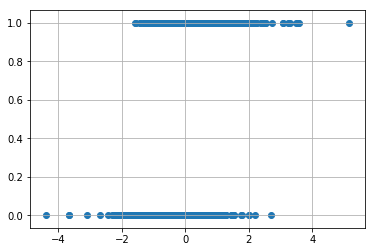

In [25]:
source = 'my'
ind = (dfb.betIsStart == 1) & ((dfb['ranking_' + source + '1'] != -1) & (dfb['ranking_' + source + '2'] != -1))# | (dfb['ranking_my1'] != -1) & (dfb['ranking_my2'] != -1))
ind0 = ((dfb['ranking_' + source + '1'] != -1) & (dfb['ranking_' + source + '2'] != -1))
plt.figure()
plt.scatter(dfb.loc[ind, 'ranking_' + source + '1'] - dfb.loc[ind, 'ranking_' + source + '2'], dfb.loc[ind, 'y'])
plt.grid()
plt.show()

In [26]:
dfbf = dfb.copy()
ff = ['ranking_ittf', 'ranking_my', 'ranking_liga_pro', 'ranking_ttfr']
for f in ff:
    dfbf[f] = dfbf[f + '1'] - dfbf[f + '2']
    dfbf.loc[(dfbf[f + '1'] == -1) | (dfbf[f + '2'] == -1), f] = 0

dfbf['ovo_win'] = (dfbf['oneVSone_win1'] + 1e-9) / (dfbf['oneVSone_win1'] + dfbf['oneVSone_win2'] + 2e-9)
dfbf['ovo_win'] -= 0.5
dfbf['ovo_set'] = (dfbf['oneVSone_set1'] + 1) / (dfbf['oneVSone_set1'] + dfbf['oneVSone_set2'] + 2)
dfbf['ovo_set'] -= 0.5
#    dfbf[f + '_fl'] = 1
#    dfbf.loc[(dfbf[f + '1'] == -1) | (dfbf[f + '2'] == -1), f + '_fl'] = 0
dfbf['bkfon'] = np.log(dfbf['bkfonProb'] / (1 - dfbf['bkfonProb']))

In [27]:
dfbf[['players1', 'players2', 'oneVSone_win1', 'oneVSone_win2', 'ovo_win', 'ovo_set']]

,players1,players2,oneVSone_win1,oneVSone_win2,ovo_win,ovo_set
3941,Денис Гаврилов,Арсений Гусев,1,2,-0.166667,0.033333
3942,Рамиль Мутыгуллин,Михаил Гладышев,0,0,0.000000,0.000000
3943,Вячеслав Кривошеев,Денис Гаврилов,7,3,0.200000,0.138889
3944,Михаил Гладышев,Андрей Цыбин,1,0,0.500000,0.300000
3945,Арсений Гусев,Рамиль Мутыгуллин,0,0,0.000000,0.000000
3946,Андрей Цыбин,Денис Гаврилов,1,2,-0.166667,-0.100000
3947,Рамиль Мутыгуллин,Вячеслав Кривошеев,0,0,0.000000,0.000000
3948,Михаил Гладышев,Арсений Гусев,0,2,-0.500000,-0.083333
3949,Андрей Цыбин,Вячеслав Кривошеев,0,3,-0.500000,-0.269231
3950,Денис Гаврилов,Рамиль Мутыгуллин,0,0,0.000000,0.000000


In [28]:
(dfbf.loc[ind, ['ranking_my','ranking_my1','ranking_my2','ids1','ids2','players1', 'players2']]).sort_values('ranking_my')

,ranking_my,ranking_my1,ranking_my2,ids1,ids2,players1,players2
5169,-4.407030,-6.075271,-1.668242,m2716,m224,Янив Бланк,Гай Кохли
5172,-3.665153,-5.333395,-1.668242,m2721,m224,Йони Ярмияу,Гай Кохли
5080,-3.660145,-2.827950,0.832195,m2712,m63,Юрий Илларионов,Виталий Филичев
7149,-3.114594,-0.797578,2.317016,w126,w2920,Элина Вахрушева,Ольга Шрамко
16636,-2.699636,-0.325150,2.374486,m1686,m1385,Рональд Реджеп,Placek Frantisek
17963,-2.435028,0.459165,2.894193,m2704,m1975,Kadlcek Michal,CHTCHETININE Evgueni
18035,-2.305516,0.372154,2.677670,m2704,m2390,Kadlcek Michal,Vrablik Jiri
5177,-2.253370,-4.492020,-2.238650,m2716,m2719,Янив Бланк,Авив Амидор
11236,-2.216470,-2.915333,-0.698863,m16404,m2739,Юрий Меркушин,Антон Кулаков
5181,-2.216116,-4.492020,-2.275904,m2716,m2715,Янив Бланк,Мааян Франк


In [29]:
(dfbf.loc[ind, ['ranking_ttfr','ranking_ttfr1','ranking_ttfr2','ids1','ids2','players1', 'players2']]).sort_values('ranking_ttfr')

,ranking_ttfr,ranking_ttfr1,ranking_ttfr2,ids1,ids2,players1,players2
8075,-1054.0,0.0,1054.0,m261,m21,Александр Винокуров,Алексей Бритвин
10737,-470.0,309.0,779.0,m2730,m7195,Николай Егоров,Карпеш Роман
11151,-470.0,309.0,779.0,m2730,m7195,Николай Егоров,Карпеш Роман
10734,-465.0,309.0,774.0,m2730,m2708,Николай Егоров,Александр Лаврентьев
11093,-465.0,309.0,774.0,m2730,m2708,Николай Егоров,Александр Лаврентьев
10280,-447.0,309.0,756.0,m2730,m409,Николай Егоров,Александр Либацкий
11757,-427.0,524.0,951.0,m552,m326,Алексей Попов,Алексей Желубенков
4117,-426.0,969.0,1395.0,w57,w73,Екатерина Мещанинова,Ирина Ермакова
5908,-422.0,537.0,959.0,w15,w135,Анастасия Шевцова,Екатерина Кученкова
10468,-400.0,332.0,732.0,m7682,m448,Бекташ Игорь,Павел Пиньковский


In [30]:
dfbf

,date,time,compName,ids1,ids2,players1,players2,setsScore,pointsScore,y,...,oneVSone_set2,betIsStart,bkfonProb,ranking_ittf,ranking_my,ranking_liga_pro,ranking_ttfr,ovo_win,ovo_set,bkfon
3941,2016-02-25,10:00,"Мастер-тур, 2016-02-25",m81,m43,Денис Гаврилов,Арсений Гусев,3:1,11:3;9:11;11:2;11:7,1,...,6,1,0.521622,0.0,0.092171,0.0,-60.0,-0.166667,0.033333,0.086540
3942,2016-02-25,10:30,"Мастер-тур, 2016-02-25",m164,m142,Рамиль Мутыгуллин,Михаил Гладышев,2:3,9:11;7:11;11:9;11:7;5:11,0,...,0,1,0.578947,-131.0,-0.139871,0.0,-34.0,0.000000,0.000000,0.318454
3943,2016-02-25,11:00,"Мастер-тур, 2016-02-25",m71,m81,Вячеслав Кривошеев,Денис Гаврилов,3:1,11:8;11:6;11:13;11:9,1,...,12,1,0.578947,0.0,0.225822,0.0,85.0,0.200000,0.138889,0.318454
3944,2016-02-25,11:30,"Мастер-тур, 2016-02-25",m142,m41,Михаил Гладышев,Андрей Цыбин,3:0,11:7;11:8;14:12,1,...,0,0,0.896414,391.0,1.058567,0.0,301.0,0.500000,0.300000,2.158004
3945,2016-02-25,12:00,"Мастер-тур, 2016-02-25",m43,m164,Арсений Гусев,Рамиль Мутыгуллин,2:3,14:12;13:15;11:8;9:11;5:11,0,...,0,0,0.549598,95.0,0.000893,0.0,68.0,0.000000,0.000000,0.199046
3946,2016-02-25,12:30,"Мастер-тур, 2016-02-25",m41,m81,Андрей Цыбин,Денис Гаврилов,1:3,9:11;11:9;9:11;9:11,0,...,8,1,0.736842,0.0,-1.011759,0.0,-275.0,-0.166667,-0.100000,1.029619
3947,2016-02-25,13:00,"Мастер-тур, 2016-02-25",m164,m71,Рамиль Мутыгуллин,Вячеслав Кривошеев,1:3,6:11;9:11;14:12;8:11,0,...,0,1,0.549598,-264.0,-0.318886,0.0,-93.0,0.000000,0.000000,0.199046
3948,2016-02-25,13:30,"Мастер-тур, 2016-02-25",m142,m43,Михаил Гладышев,Арсений Гусев,0:3,8:11;9:11;6:11,0,...,6,1,0.450402,36.0,0.138978,0.0,-34.0,-0.500000,-0.083333,-0.199046
3949,2016-02-25,14:00,"Мастер-тур, 2016-02-25",m41,m71,Андрей Цыбин,Вячеслав Кривошеев,3:2,11:5;4:11;9:11;11:8;11:7,1,...,9,1,0.220779,-524.0,-1.237581,0.0,-360.0,-0.500000,-0.269231,-1.261131
3950,2016-02-26,10:00,"Мастер-тур, 2016-02-25",m81,m164,Денис Гаврилов,Рамиль Мутыгуллин,2:3,11:8;11:9;7:11;8:11;9:11,0,...,0,1,0.394330,0.0,0.096783,0.0,8.0,0.000000,0.000000,-0.429148


In [31]:
features = ['ranking_my', 'ranking_ttfr', 'ranking_ittf', 'bkfon', 'ovo_win', 'ovo_set', 'ranking_liga_pro']
#features = ['ranking_my', 'ranking_ttfr', 'ranking_ittf', 'bkfon', 'ovo_win', 'ovo_set']#, 'ranking_liga_pro']
#features = ['ranking_my', 'ranking_ttfr', 'ranking_ittf', 'ovo_win', 'ovo_set']#, 'ranking_liga_pro']
#features += [e + '_fl' for e in features if e != 'bkfon']
#x = np.array(dfb.loc[ind, 'ranking_ttfr1'] - dfb.loc[ind, 'ranking_ttfr2']).reshape(-1, 1)
#x = np.hstack([x, np.array(dfb.loc[ind, 'ranking_my1'] - dfb.loc[ind, 'ranking_my2']).reshape(-1, 1)])
#x = np.hstack([x, np.array(dfb.loc[ind, 'ranking_liga_pro1'] - dfb.loc[ind, 'ranking_liga_pro2']).reshape(-1, 1)])
x = np.array(dfbf.loc[ind, features])
x0 = np.array(dfbf.loc[ind0, features])
y = np.array(dfb.loc[ind, 'y'])
xx = np.vstack([x, -x])
yy = np.hstack([y, (1 - y)])
model = linear_model.LogisticRegression(fit_intercept=False)
model.fit(xx, yy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
print(model.coef_)

[[  1.68779589e+00   9.94738850e-05  -2.53201465e-04   3.45029446e-01
   -1.10252431e-01   8.83282605e-01   2.18268210e-04]]


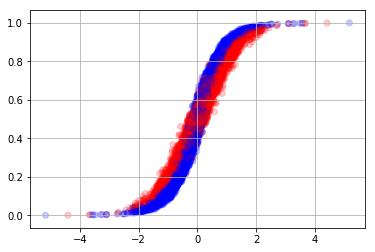

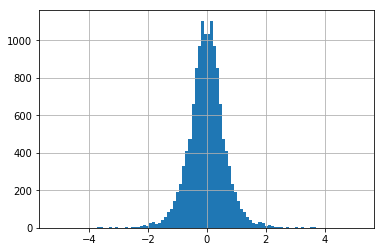

In [33]:
plt.figure()
plt.scatter(xx[:,0], model.predict_proba(xx)[:,1], color = ['blue' if e==1 else 'red' for e in y], alpha=0.2)
plt.grid()
plt.show()

plt.figure()
plt.hist(xx[:, 0] ,100);
plt.grid()
plt.show()

In [34]:
model.predict_proba(x)[:,1]

array([ 0.55657519,  0.47591594,  0.64567932, ...,  0.20335983,
        0.37868577,  0.46205427])

In [35]:
score_bk = 0
score = 0
pred = model.predict_proba(x)[:,1]
pred0 = model.predict_proba(x0)[:,1]
for ym,pm,pf in zip(y, pred, dfb.loc[ind, 'bkfonProb']):
    if ym == 1:
        score += np.log(pm)
        score_bk += np.log(pf)
    else:
        score += np.log(1 - pm)
        score_bk += np.log(1 - pf)

In [36]:
[-score / len(y), -score_bk / len(y)]

[0.59631686346970925, 0.70979795688744041]

In [100]:
dfb.loc[ind, 'pred1'] = pred
dfb.loc[ind, 'pred'] = pred * y + (1 - pred) * (1 - y)

dfb.loc[ind0, 'pred_live1'] = pred0

In [101]:
dfb['betSetScore'] = dfb['betScore'].apply(lambda x: [int(e) for e in x.split(' ')[0].split(':')])
dfb['betLastSetPointScore'] = dfb['betScore'].apply(lambda x: x.split(')')[0].replace('(','').replace('*','').split(' ')[-1])
dfb['betLastSetPointScore'] = dfb['betLastSetPointScore'].apply(lambda x: [int(e) for e in x.split('-')] if x != '0:0' else [0, 0])
dfb['betSetCnt'] = dfb['betScore'].apply(lambda x: 4 if x.find('7сетов') != -1 else 3)

In [102]:
dfb.loc[ind0, 'pred_live_adj1'] = dfb[ind0].\
    apply(lambda x: TTMatchModel.predictPWinByScore(x['pred_live1'], x['betSetCnt'], x['betSetScore'],
                                                    x['betLastSetPointScore']), axis = 1)

In [103]:
dfb.loc[ind0, 'pred_live_adj'] = dfb.loc[ind0, 'pred_live_adj1'] * dfb.loc[ind0, 'y'] + \
                                 (1 - dfb.loc[ind0, 'pred_live_adj1']) * (1 - dfb.loc[ind0, 'y'])

In [104]:
dfb.loc[(~dfb.k1.isnull()) & (dfb.betIsStart == 0), 
        ['players1', 'players2', 'betScore', 'betSetScore', 'betLastSetPointScore', 'date', 'pred_live', 'pred_live_adj']].\
    sort_values('date', ascending = 0)


,players1,players2,betScore,betSetScore,betLastSetPointScore,date,pred_live,pred_live_adj
20555,Светлана Крекина,Ольга Куликова,0:0 5сетов (1-0*),"[0, 0]","[1, 0]",2017-06-20,NaN,0.806211
20554,Валентина Сабитова,Анна Фарладанская,0:0 5сетов (2*-2),"[0, 0]","[2, 2]",2017-06-20,NaN,0.750309
20553,Ирина Ермакова,Елена Трошнева,0:0 5сетов (3*-0),"[0, 0]","[3, 0]",2017-06-20,NaN,0.674331
20540,Елена Трошнева,Валентина Сабитова,2:1 5сетов (13-11 11-6 11-13 0-0*),"[2, 1]","[0, 0]",2017-06-20,NaN,0.316780
20537,Анна Фарладанская,Елена Трошнева,0:0 5сетов (2-2*),"[0, 0]","[2, 2]",2017-06-20,NaN,0.731178
8370,Валентина Сабитова,Ольга Куликова,0:0 5сетов (0-1*),"[0, 0]","[0, 1]",2017-06-19,NaN,0.289257
20522,Александр Винокуров,Сергей Мокрополов,0:0 5сетов (5-4*),"[0, 0]","[5, 4]",2017-06-19,NaN,0.736356
20520,Карен Мовсисян,Сергей Мокрополов,0:0 5сетов (3-2*),"[0, 0]","[3, 2]",2017-06-19,NaN,0.759173
20516,Александр Винокуров,Андрей Карпов,0:0 5сетов (3*-3),"[0, 0]","[3, 3]",2017-06-19,NaN,0.443867
20493,Алексей Нефедов,Инназаров Алексей,0:0 5сетов (9-5*),"[0, 0]","[9, 5]",2017-06-19,NaN,0.600122


In [105]:
display(dfb.loc[dfb.compName.apply(lambda x: x.find('Лига-Про') == -1) & (dfb.pred==dfb.pred) & ((dfb.players1 + dfb.players2).apply(lambda x: x.find('Левай') == -1)), \
                ['date', 'players1', 'players2', 'y', 'betScore','k1','k2','betFinalScore', \
                 'ranking_liga_pro1', 'ranking_liga_pro2','ranking_my1', 'ranking_my2','bkfonProb', 'pred', 'betIsStart']].sort_values('date', ascending = True))

,date,players1,players2,y,betScore,k1,k2,betFinalScore,ranking_liga_pro1,ranking_liga_pro2,ranking_my1,ranking_my2,bkfonProb,pred,betIsStart
15379,2016-02-24,Янош Бенце Майорош,Адмир Дуранспахич,1,0:0 5сетов (0-0),1.95,1.75,3:1 5сетов (6-11 11-5 11-9 11-8) ИТОГ,-1.0,-1.0,1.580393,1.246976,0.472973,0.572514,1
15378,2016-02-24,Kosowski Jakub,Янош Бенце Майорош,1,0:0 5сетов (0-0),1.53,2.35,3:2 5сетов (9-11 10-12 11-5 11-8 11-3) ИТОГ,-1.0,-1.0,2.060761,1.580393,0.605670,0.651688,1
15377,2016-02-24,Kosowski Jakub,Мирослав Горжейший,0,0:0 5сетов (0-0),2.25,1.57,0:3 5сетов (9-11 9-11 7-11) ИТОГ,-1.0,-1.0,2.060761,2.291876,0.589005,0.524214,1
15375,2016-02-24,Мирослав Горжейший,Адмир Дуранспахич,0,0:0 5сетов (0*-0),1.15,4.80,1:3 5сетов (7-11 8-11 11-3 7-11) ИТОГ,-1.0,-1.0,2.291876,1.246976,0.193277,0.309730,1
3941,2016-02-25,Денис Гаврилов,Арсений Гусев,1,0:0 5сетов (0-0*),1.77,1.93,3:1 5сетов (11-3 9-11 11-2 11-7) ИТОГ,-1.0,-1.0,1.697945,1.470128,0.521622,0.574153,1
15381,2016-02-25,Мирослав Горжейший,Янош Бенце Майорош,1,0:0 5сетов (0*-0),1.35,3.00,3:0 5сетов (11-5 11-8 11-9) ИТОГ,-1.0,-1.0,2.291335,1.608182,0.689655,0.716554,1
15380,2016-02-25,Андрей Ситак,Szudi Adam,0,0:0 5сетов (0-0),5.10,1.13,0:3 5сетов (11-13 5-11 10-12) ИТОГ,-1.0,-1.0,0.899531,1.501798,0.818620,0.549289,1
15384,2016-02-25,Szudi Adam,Адмир Дуранспахич,1,0:0 5сетов (0-0),1.53,2.35,3:0 5сетов (11-5 11-7 11-2) ИТОГ,-1.0,-1.0,1.501798,1.285807,0.605670,0.585529,1
15382,2016-02-25,Kosowski Jakub,Андрей Ситак,0,0:0 5сетов (0-0*),1.15,4.80,0:3 5сетов (6-11 9-11 6-11) ИТОГ,-1.0,-1.0,1.927313,0.899531,0.193277,0.354240,1
15383,2016-02-25,Андрей Ситак,Адмир Дуранспахич,1,0:0 5сетов (0-0*),4.20,1.19,3:1 5сетов (12-10 8-11 11-9 11-9) ИТОГ,-1.0,-1.0,0.899531,1.285807,0.220779,0.261654,1


In [106]:
display(dfb.loc[dfb.compName.apply(lambda x: x.find('Лига-Про') != -1) & (dfb.pred==dfb.pred), \
                ['date', 'players1', 'players2', 'y', 'betScore','k1','k2','betFinalScore', \
                 'ranking_ttfr1', 'ranking_ttfr2', 'ranking_my1', 'ranking_my2', 'ranking_liga_pro1', 'ranking_liga_pro2',\
                 'bkfonProb', 'pred', 'betIsStart']].sort_values('pred', ascending = True))

,date,players1,players2,y,betScore,k1,k2,betFinalScore,ranking_ttfr1,ranking_ttfr2,ranking_my1,ranking_my2,ranking_liga_pro1,ranking_liga_pro2,bkfonProb,pred,betIsStart
11088,2017-05-10,Анатолий Нам,Александр Екжанов,0,0:0 5сетов (0-0),1.65,2.10,1:3 (9-11 11-8 13-15 9-11),-1.0,-1.0,-0.173101,-2.528527,434.0,414.0,0.440000,0.093281,1
10051,2017-03-16,Татьяна Ивахина,Наталья Малинина,1,0:0 5сетов (0-0),2.85,1.37,3:0 5сетов (11-5 11-6 11-8) ИТОГ,1053.0,1113.0,-1.373528,0.483091,1100.0,1212.0,0.324645,0.094398,1
8916,2017-01-12,Анна Иванникова,Анна Россихина,1,0:0 5сетов (0-0),4.20,1.19,3:1 5сетов (6-11 12-10 11-7 11-9) ИТОГ,1113.0,1298.0,0.043747,0.986944,-1.0,-1.0,0.220779,0.133948,1
9614,2017-02-18,Илья Анохин,Павел Малахов,1,0:0 5сетов (0-0),1.85,1.85,3:1 5сетов (11-6 6-11 11-5 13-11*),666.0,818.0,-1.824561,-0.182629,-1.0,-1.0,0.500000,0.153826,1
9631,2017-02-20,Юрий Бесчастный,Максим Савинов,1,0:0 5сетов (0*-0),3.00,1.35,3:0 5сетов (11-8 13-11 15-13) ИТОГ,987.0,1013.0,-0.783933,0.274459,964.0,1067.0,0.310345,0.155677,1
11386,2017-05-22,MARINKOVIC Nikola,Виталий Мурзин,1,0:0 5сетов (0-0),3.50,1.25,3:1 (12-14 11-8 11-7 11-6),-1.0,1522.0,0.408896,1.333987,1250.0,1473.0,0.263158,0.168370,1
11446,2017-05-25,Кристина Казанцева,Анна Козловская,1,0:0 5сетов (0*-0),3.00,1.35,3:2 (11-8 13-11 9-11 7-11 13-11),1445.0,1549.0,0.770832,1.698375,1341.0,1575.0,0.310345,0.172226,1
8877,2017-01-10,Максим Содыль,Роман Бортников,1,0:0 5сетов (0-0),2.50,1.45,3:2 5сетов (6-11 11-9 9-11 11-9 11-4) ИТОГ,581.0,789.0,-1.501019,-0.537457,-1.0,-1.0,0.367089,0.173826,1
9931,2017-03-09,Анастасия Фомина,Ирина Нефедова,1,0:0 5сетов (0-0),2.70,1.40,3:2 5сетов (6-11 11-5 9-11 11-5 11-9) ИТОГ,-1.0,960.0,-0.992290,-0.252802,928.0,953.0,0.341463,0.176132,1
11923,2017-06-15,Владимир Немашкало,Василий Ермилин,0,0:0 5сетов (0*-0),2.45,1.48,1:3 (3-11 8-11 11-4 6-11),-1.0,-1.0,-2.100114,-3.420982,444.0,445.0,0.623410,0.179360,1


In [107]:
#dfb['bet1'] = dfb['k1'] * dfb['pred1'] * (2 * dfb['y'] - 1)
#dfb['bet2'] = dfb['k2'] * (1 - dfb['pred1']) * -(2 * dfb['y'] - 1)
dfb['bet1'] = dfb['k1'] * dfb['pred_live_adj1'] * (2 * dfb['y'] - 1)
dfb['bet2'] = dfb['k2'] * (1 - dfb['pred_live_adj1']) * -(2 * dfb['y'] - 1)

dfb['betFl1'] = dfb['bet1'].apply(lambda x: 1 if abs(x) > 1 else 0)
dfb['betFl2'] = dfb['bet2'].apply(lambda x: 1 if abs(x) > 1 else 0)

dfb['rev1'] = dfb['betFl1'] * ((dfb['k1'] - 1) * (dfb['y']) - (1 - dfb['y']))
dfb['rev2'] = dfb['betFl2'] * ((dfb['k2'] - 1) * (1 - dfb['y']) - (dfb['y']))
dfb['rev'] = dfb['rev1'] + dfb['rev2']

dfb['rev1_s'] = dfb['betFl1'] * ((dfb['k1'] - 1) * (dfb['y']) - (1 - dfb['y'])) * abs(dfb['bet1'])
dfb['rev2_s'] = dfb['betFl2'] * ((dfb['k2'] - 1) * (1 - dfb['y']) - (dfb['y'])) * abs(dfb['bet2'])
dfb['rev_s'] = dfb['rev1_s'] + dfb['rev2_s']

#dfb['betSum'] = dfb[]

In [108]:
#df_lp = dfb[dfb.compName.apply(lambda x: x.find('Лига-Про') != -1) & \
#            (dfb.pred_live_adj==dfb.pred_live_adj) & (dfb.betIsStart == 0)].copy()

display(dfb.loc[dfb.compName.apply(lambda x: x.find('Лига-Про') != -1) \
                & (dfb.pred_live_adj==dfb.pred_live_adj) & (dfb.betIsStart != -1), \
                ['date', 'players1', 'players2', 'y', 'pred1', 'bet1', 'bet2', 'rev', 'rev_s', 'betFl1', 'betFl2', 
                 'k1','k2','betScore','betFinalScore', 'pred', 'pred_live_adj'\
                 ]].sort_values('date', ascending = False).head(50))

,date,players1,players2,y,pred1,bet1,bet2,rev,rev_s,betFl1,betFl2,k1,k2,betScore,betFinalScore,pred,pred_live_adj
11965,2017-06-17,Юрий Меркушин,Илья Корогодский,1,0.443833,0.976433,-0.889867,0.00,0.000000,0,0,2.20,1.60,0:0 5сетов (0-0),3:2 (11-9 11-13 9-11 11-7 11-7),0.443833,0.443833
11962,2017-06-17,Алик Гиревенков,Илья Корогодский,0,0.448443,-0.829620,1.020380,0.85,0.867323,0,1,1.85,1.85,0:0 5сетов (0-0),2:3 (11-9 7-11 7-11 11-6 6-11),0.551557,0.551557
11959,2017-06-17,Юрий Меркушин,Алик Гиревенков,0,0.442664,-0.677276,1.309740,1.35,1.768149,0,1,1.53,2.35,0:0 5сетов (0-0),0:3 (11-13 4-11 7-11),0.557336,0.557336
11956,2017-06-17,Алик Гиревенков,Юрий Меркушин,1,0.558410,1.033058,-0.816942,0.85,0.878099,1,0,1.85,1.85,0:0 5сетов (0-0) за 3-е место,3:2 (11-9 11-4 5-11 8-11 11-8) за 3-е место,0.558410,0.558410
11940,2017-06-16,Дарья Чернорай,Ольга Гордеева,1,0.507537,1.040450,-0.827338,1.05,1.092473,1,0,2.05,1.68,0:0 5сетов (0-0*),3:0 (11-8 11-7 11-4),0.507537,0.507537
11931,2017-06-16,Анна Козловская,Валерия Щербатых,1,0.669602,1.238763,-0.611237,0.85,1.052949,1,0,1.85,1.85,0:0 5сетов (0-0),3:1 (11-5 10-12 11-7 11-4),0.669602,0.669602
11932,2017-06-16,Дарья Чернорай,Ольга Гордеева,1,0.597044,1.003034,-0.826060,0.68,0.682063,1,0,1.68,2.05,0:0 5сетов (0*-0),3:2 (8-11 11-8 12-10 7-11 11-8),0.597044,0.597044
11933,2017-06-16,Ольга Гордеева,Елизавета Хлызова,1,0.366221,0.805686,-1.014047,-1.00,-1.014047,0,1,2.20,1.60,0:0 5сетов (0-0*),3:1 (11-2 12-10 1-11 11-7),0.366221,0.366221
11934,2017-06-16,Валерия Щербатых,Дарья Чернорай,1,0.682912,1.044856,-0.745156,0.53,0.553773,1,0,1.53,2.35,0:0 5сетов (0-0*),3:0 (11-9 11-4 11-6),0.682912,0.682912
11935,2017-06-16,Анна Козловская,Ольга Гордеева,1,0.839516,1.284460,-0.377137,0.53,0.680764,1,0,1.53,2.35,0:0 5сетов (0-0*),3:0 (11-5 11-6 11-5),0.839516,0.839516


In [109]:
#df_lp.to_csv('bets.txt', sep = '\t', index = False, float_format='%.2f', decimal=',')

In [110]:
dfb.to_csv('bets_all.txt', sep = '\t', index = False, float_format='%.2f', decimal=',')

In [111]:
dfb.compName.apply(lambda x: x[:10]).value_counts()

Мастер-тур    3460
Лига-Про (    2874
Наст. тенн    2061
Челленджер      89
Жен. Челле       7
Лига Про.        3
Name: compName, dtype: int64

In [112]:
dfb['rev_lp'] = dfb['rev'] * dfb.compName.apply(lambda x: x[:10].find('Лига-Про') != -1).apply(int)
dfb['rev_s_lp'] = dfb['rev_s'] * dfb.compName.apply(lambda x: x[:10].find('Лига-Про') != -1).apply(int)

dfb['rev_cs'] = dfb['rev'] * dfb.compName.apply(lambda x: x.find('Чел') != -1).apply(int)
dfb['rev_s_cs'] = dfb['rev_s'] * dfb.compName.apply(lambda x: x.find('Чел') != -1).apply(int)

dfb['rev_mt'] = dfb['rev'] * dfb.compName.apply(lambda x: x[:10].find('Мастер') != -1).apply(int)
dfb['rev_s_mt'] = dfb['rev_s'] * dfb.compName.apply(lambda x: x[:10].find('Мастер') != -1).apply(int)

dfb['rev_ittf'] = dfb['rev'] * dfb.compName.apply(lambda x: x[:10].find('Международ') != -1).apply(int)
dfb['rev_s_ittf'] = dfb['rev_s'] * dfb.compName.apply(lambda x: x[:10].find('Международ') != -1).apply(int)


In [113]:
pr1 = dfb[['players1', 'rev_s']].groupby('players1').agg(sum).reset_index()
pr1.columns = ['player', 'rev_s_1']
pr2 = dfb[['players2', 'rev_s']].groupby('players2').agg(sum).reset_index()
pr2.columns = ['player', 'rev_s_2']
pr12 = pr1.merge(pr2, how = 'outer').fillna(0)
pr12['rev_s'] = pr12['rev_s_1'] + pr12['rev_s_2']
pr = pr12[['player', 'rev_s']].sort_values('rev_s')
display(pr)

,player,rev_s
171,Валерий Раков,-26.694110
358,Манук Заргарян,-22.576407
107,Алексей Силантьев,-22.362023
21,Gauzy Paul,-19.773618
310,Ирина Скляр,-19.132672
12,CHTCHETININE Evgueni,-18.880869
389,Никита Кириллов,-15.843478
104,Алексей Пашин,-14.807306
493,Томаш Конечны,-13.678033
103,Алексей Нефедов,-12.887522


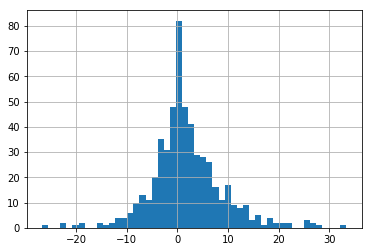

In [114]:
plt.figure()
plt.hist(pr.rev_s, 50)
plt.grid()
plt.show()

In [115]:
print([dfb['rev_lp'].sum(), dfb['rev_s_lp'].sum()])
print([dfb['rev_cs'].sum(), dfb['rev_s_cs'].sum()])
print([dfb['rev_mt'].sum(), dfb['rev_s_mt'].sum()])
print([dfb['rev_ittf'].sum(), dfb['rev_s_ittf'].sum()])

[86.220000000000013, 121.74257246696979]
[69.250000000000014, 102.42276143652468]
[165.53, 235.08857070954798]
[0.0, 0.0]


In [116]:
#dfb.loc[6538,:]

In [117]:
display(dfb.loc[(dfb.players1 + dfb.players2).apply(lambda x: x.find('CHTCHETININE ') != -1) & (dfb.pred==dfb.pred), \
                ['date', 'time', 'players1', 'players2', 'pred1', 'ranking_my1', 'ranking_my2','bet1', 'bet2', 'rev', 'rev_s', 
                 'k1','k2','betFinalScore', 'oneVSone_win1', 'oneVSone_win2', 'pred']].sort_values('rev_s', ascending = True))

,date,time,players1,players2,pred1,ranking_my1,ranking_my2,bet1,bet2,rev,rev_s,k1,k2,betFinalScore,oneVSone_win1,oneVSone_win2,pred
16196,2016-05-12,13:20,Янош Бенце Майорош,CHTCHETININE Evgueni,0.263575,1.591176,2.792045,-2.108600,0.773246,-1.00,-2.108600,8.00,1.05,0:3 5сетов (8-11 9-11 10-12) ИТОГ,0,1,0.736425
19294,2017-03-01,11:00,Эрик Жоути,CHTCHETININE Evgueni,0.284156,1.778322,2.768608,-1.676523,0.787428,-1.00,-1.676523,5.90,1.10,0:3 5сетов (5-11 3-11 8-11) ИТОГ,0,1,0.715844
18060,2016-10-24,21:30,Якуб Клепрлик,CHTCHETININE Evgueni,0.319126,2.044243,2.809064,-1.659453,0.762579,-1.00,-1.659453,5.20,1.12,0:3 5сетов (5-11 9-11 9-11) ИТОГ,0,1,0.680874
17193,2016-08-11,15:20,Станислав Кучера,CHTCHETININE Evgueni,0.194773,0.728120,2.778258,-1.655568,0.845489,-1.00,-1.655568,8.50,1.05,0:3 5сетов (6-11 3-11 8-11) ИТОГ,0,0,0.805227
18154,2016-11-03,14:20,Криштиан Надь,CHTCHETININE Evgueni,0.246974,1.638748,2.819693,-1.605331,0.813268,-1.00,-1.605331,6.50,1.08,1:3 5сетов (7-11 11-8 3-11 7-11) ИТОГ,0,7,0.753026
18624,2016-12-13,10:20,CHTCHETININE Evgueni,Kojic Frane,0.600012,2.764242,2.201373,-1.530030,0.579983,-1.00,-1.530030,2.55,1.45,0:3 5сетов (4-11 12-14 8-11) ИТОГ,1,4,0.399988
16193,2016-05-12,11:20,Kriston Daniel,CHTCHETININE Evgueni,0.215678,1.398740,2.792045,-1.488176,0.839225,-1.00,-1.488176,6.90,1.07,0:3 5сетов (12-14 3-11 15-17) ИТОГ,0,1,0.784322
19311,2017-03-02,15:00,Маркос Мадрид,CHTCHETININE Evgueni,0.356634,1.807011,2.783958,-1.426537,0.772039,-1.00,-1.426537,4.00,1.20,0:3 5сетов (5-11 4-11 10-12) ИТОГ,0,0,0.643366
16761,2016-06-29,11:20,Люциан Блащик,CHTCHETININE Evgueni,0.469947,2.473391,2.753710,-1.409841,0.715572,-1.00,-1.409841,3.00,1.35,0:3 5сетов (5-11 4-11 8-11*),1,1,0.530053
15570,2016-03-22,16:50,DAVID Petr,CHTCHETININE Evgueni,0.446161,2.229941,2.765750,0.655857,-1.384597,-1.00,-1.384597,1.47,2.50,3:1 5сетов (11-7 11-7 14-16 11-3) ИТОГ,5,2,0.446161


In [118]:
display(dfb.loc[dfb.compName.apply(lambda x: x.find('Мастер') != -1) & (dfb.pred==dfb.pred), \
                ['date', 'time', 'players1', 'players2', 'y', 'pred1', 'bet1', 'bet2', 'rev', 'rev_s', 'betFl1', 'betFl2', 
                 'k1','k2','betFinalScore', 'oneVSone_win1', 'oneVSone_win2', 'pred']].sort_values('rev_s', ascending = True))

,date,time,players1,players2,y,pred1,bet1,bet2,rev,rev_s,betFl1,betFl2,k1,k2,betFinalScore,oneVSone_win1,oneVSone_win2,pred
4267,2016-03-31,14:00,Евгений Лучинин,Игорь Гудилкин,0,0.579200,-2.780161,0.483920,-1.00,-2.780161,1,0,4.80,1.15,2:3 5сетов (9-11 5-11 11-6 11-7 8-11) ИТОГ,0,0,0.420800
4821,2016-06-03,11:30,Юрий Лобовиков,Илья Вульфсон,0,0.450638,-2.163064,0.631766,-1.00,-2.163064,1,0,4.80,1.15,0:3 5сетов (8-11 8-11 7-11) ИТОГ https://www.y...,0,0,0.549362
5967,2016-09-26,18:00,Елизавета Хлызова,Мария Виноградова,0,0.528531,-2.034846,0.575192,-1.00,-2.034846,1,0,3.85,1.22,1:3 5сетов (5-11 11-9 6-11 7-11) ИТОГ,0,0,0.471469
4002,2016-03-03,18:30,Георгий Рубинштейн,Андрей Мазунов,1,0.464512,0.580640,-1.954531,-1.00,-1.954531,0,1,1.25,3.65,3:1 5сетов (11-4 8-11 11-4 11-9) ИТОГ,0,0,0.464512
6136,2016-10-18,12:00,Анна Храмцова,Маргарита Фетюхина,0,0.405667,-1.947200,0.683483,-1.00,-1.947200,1,0,4.80,1.15,0:3 5сетов (2-11 9-11 3-11) ИТОГ,0,0,0.594333
5861,2016-09-17,14:00,Итамар Аврамов,Элад Куперберг,0,0.639930,-1.919790,0.486095,-1.00,-1.919790,1,0,3.00,1.35,2:3 5сетов (8-11 11-9 11-8 7-11 3-11) ИТОГ,8,9,0.360070
5422,2016-08-01,11:30,Людмила Кирица,Екатерина Гусева,0,0.454991,-1.910962,0.648561,-1.00,-1.910962,1,0,4.20,1.19,1:3 5сетов (7-11 11-7 9-11 6-11) ИТОГ,0,3,0.545009
7521,2017-03-12,10:30,Дор Орен,Гай Кохли,0,0.633693,-1.901080,0.494514,-1.00,-1.901080,1,0,3.00,1.35,1:3 5сетов (9-11 8-11 11-7 9-11) ИТОГ,0,0,0.366307
5064,2016-06-27,17:30,Денис Бочков,Филипп Куимов,0,0.630324,-1.890973,0.499062,-1.00,-1.890973,1,0,3.00,1.35,0:3 5сетов (5-11 5-11 2-11) ИТОГ,1,0,0.369676
6238,2016-10-27,18:30,Александр Резниченко,Иван Таламанов,0,0.624357,-1.873072,0.507117,-1.00,-1.873072,1,0,3.00,1.35,1:3 5сетов (7-11 11-9 12-14 10-12) ИТОГ,0,0,0.375643


In [119]:
display(dfb.loc[dfb.compName.apply(lambda x: x.find('Лига') != -1) & (dfb.pred==dfb.pred), \
                ['date', 'time', 'players1', 'players2', 'y', 'pred1', 'bet1', 'bet2', 'rev', 'rev_s', 'betFl1', 'betFl2', 
                 'k1','k2','betFinalScore', 'oneVSone_win1', 'oneVSone_win2', 'pred']].sort_values('rev_s', ascending = True))

,date,time,players1,players2,y,pred1,bet1,bet2,rev,rev_s,betFl1,betFl2,k1,k2,betFinalScore,oneVSone_win1,oneVSone_win2,pred
11593,2017-06-02,14:29,Нырков Иван,Евгений Крючков,0,0.690028,-3.864157,0.344069,-1.00,-3.864157,1,0,5.60,1.11,1:3 (10-12 5-11 11-8 6-11),1,0,0.309972
9981,2017-03-12,12:24,Крылов Александр,Дмитрий Разинков,0,0.593311,-2.491906,0.483960,-1.00,-2.491906,1,0,4.20,1.19,0:3 5сетов (9-11 9-11 8-11) ИТОГ,0,0,0.406689
10891,2017-04-29,18:56,Владимир Немашкало,Ота Рики,0,0.736684,-2.431056,0.337045,-1.00,-2.431056,1,0,3.30,1.28,0:3 9:11;5:11;10:12;,0,0,0.263316
11598,2017-06-02,11:57,Нырков Иван,Дмитрий Мерзликин,0,0.543505,-2.228371,0.547794,-1.00,-2.228371,1,0,4.10,1.20,1:3 (6-11 7-11 11-7 5-11),0,0,0.456495
10753,2017-04-22,22:14,Георгий Прикащенков,Ота Рики,0,0.744065,-2.194991,0.345512,-1.00,-2.194991,1,0,2.95,1.35,2:3 8:11;7:11;12:10;11:8;11:13;,0,0,0.255935
11920,2017-06-15,23:12,Василий Ермилин,Владимир Немашкало,1,0.271457,0.371896,-2.076348,-1.00,-2.076348,0,1,1.37,2.85,3:0 (13-11 11-3 11-9),1,1,0.271457
11409,2017-05-23,10:58,Максим Чаплыгин,Кирилл Воробьев,0,0.561210,-2.048417,0.548487,-1.00,-2.048417,1,0,3.65,1.25,0:3 (8-11 7-11 8-11),0,0,0.438790
11023,2017-05-06,19:10,Аветов Армен,Ота Рики,0,0.717805,-2.045745,0.386607,-1.00,-2.045745,1,0,2.85,1.37,1:3 (6-11 11-7 6-11 7-11),0,1,0.282195
8469,2016-12-14,15:22,Никита Кириллов,Ростислав Салкин,1,0.441841,0.552301,-2.037281,-1.00,-2.037281,0,1,1.25,3.65,3:0 5сетов (11-8 12-10 11-4) ИТОГ,1,0,0.441841
11901,2017-06-14,20:29,Сергей Гречаников,Манук Заргарян,0,0.612185,-2.020211,0.496403,-1.00,-2.020211,1,0,3.30,1.28,0:3 (6-11 10-12 8-11),1,4,0.387815


In [120]:
display(dfb.loc[dfb.compName.apply(lambda x: x.find('Международ') != -1) & (dfb.pred!=dfb.pred), \
                ['date', 'time', 'players1', 'players2', 'pred_live1', 'pred_live_adj1', 'bet1', 'bet2', 'rev_s', 
                 'k1','k2','betScore','betFinalScore', 'oneVSone_win1', 'oneVSone_win2', 'pred_live_adj']].sort_values('rev_s', ascending = True))

,date,time,players1,players2,pred_live1,pred_live_adj1,bet1,bet2,rev_s,k1,k2,betScore,betFinalScore,oneVSone_win1,oneVSone_win2,pred_live_adj


In [121]:
#display(df_lp[['date', 'players1', 'players2', 'k1', 'k2', 'y', 'pred1', 'bet1', 'bet2', 'rev']].head())

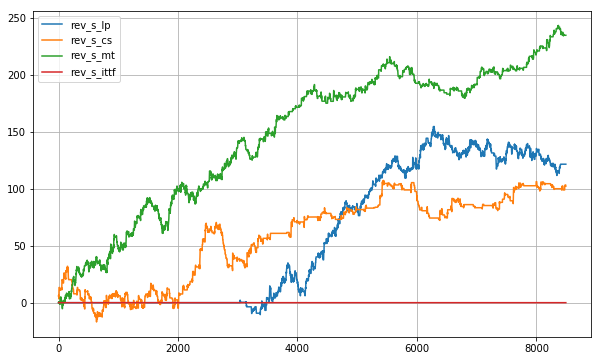

In [122]:
dfb_date = dfb.copy().sort_values('date')
#y0 = df_lp.rev.cumsum()
y_lp = dfb_date.rev_s_lp.fillna(0).cumsum()
y_cs = dfb_date.rev_s_cs.fillna(0).cumsum()
y_mt = dfb_date.rev_s_mt.fillna(0).cumsum()
y_ittf = dfb_date.rev_s_ittf.fillna(0).cumsum()

plt.figure(figsize=(10, 6))
plt.plot(list(range(len(dfb_date))), y_lp)
plt.plot(list(range(len(dfb_date))), y_cs)
plt.plot(list(range(len(dfb_date))), y_mt)
plt.plot(list(range(len(dfb_date))), y_ittf)
plt.legend()
plt.grid()
plt.show()

In [1034]:
from TTMatchModel import *

#print(0, 4, TTMatchModel.predictPSet(0.6, [0, 4]))

#print(TTMatchModel.predictPWin(0.7, 3, [0, 1]))

print(TTMatchModel.predictPWinByScore(0.6, 4, [1, 1], [9, 10]))

for i in range(9, 13):
    break
    for j in range(9, 13):
        if abs(i - j) <= 2:
            print(i, j, TTMatchModel.predictPSet(0.6, [i, j]))

0.483490947485
